<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ada Boosting

In [99]:
import numpy as np


In [100]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [102]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [103]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [105]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [106]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [108]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [109]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=1)

classifier = AdaBoostClassifier(
    estimator = base_model,
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)

In [110]:
classifier.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [111]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8875


<Axes: >

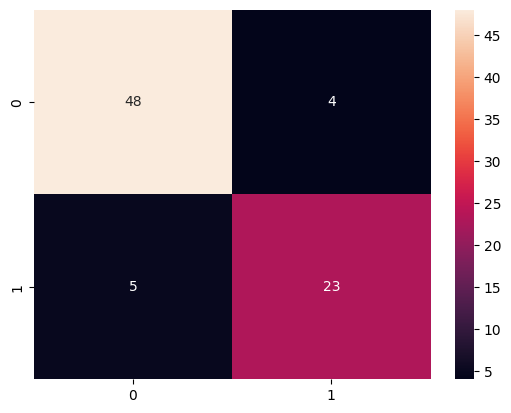

In [112]:
import seaborn as sns
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=3)

classifier = GradientBoostingClassifier(
    n_estimators = 50,
    learning_rate = 1.0,
    random_state = 42
)

In [114]:
classifier.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=42)

In [115]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.875


<Axes: >

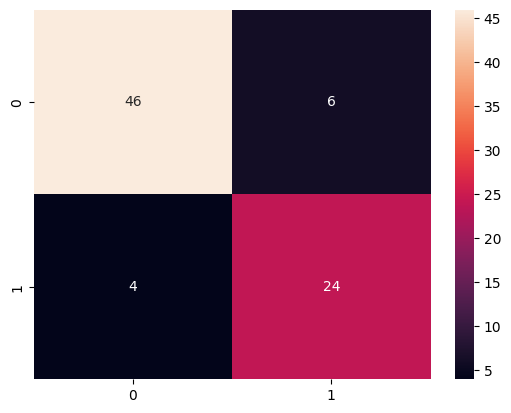

In [116]:
import seaborn as sns
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

XG Boosting

In [117]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

base_model = DecisionTreeClassifier(max_depth=3)

classifier = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 3,
    sun_samples = 0.8,
    colsample_bytree = 0.8,
    label_encoder = False,
    random_state = 42
)

In [118]:
classifier.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:22:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "label_encoder", "sun_samples" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              label_encoder=False, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [119]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9125


<Axes: >

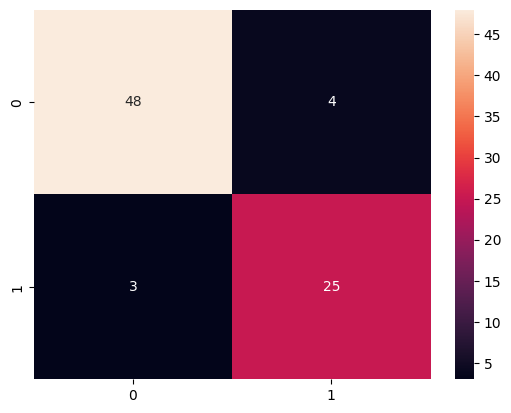

In [120]:
import seaborn as sns
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)